In [1]:
import os, json
import numpy as np

# walk = sorted(os.walk("."), key=lambda x: x[0])[::-1]
# for dirpath, dirnames, filenames in walk:
#     if "testingSetScores.json" in filenames:
#         data = json.load(open(os.path.join(dirpath, "testingSetScores.json"), "r"))
#         # sort data
#         data = dict(sorted(data.items(), key=lambda x: x[1]["ID"]))
#         deltas = []
#         for k in data:
#             initial_prompt_score = list(data[k]["initial_prompt"].values())[0]
#             optimized_prompt_score = list(data[k]["optimized_prompt"].values())[0]
#             delta = optimized_prompt_score - initial_prompt_score
#             deltas.append(delta)
            
#         print(deltas)
#         avg_change = sum(deltas) / len(deltas)
#         print(f"Avg change: {dirpath}: {avg_change}")
        
        
with open("testingSetScores.json", "r") as f:
    data = json.load(f)
    deltas = []
    for k in data:
        initial_prompt_score = list(data[k]["initial_prompt"].values())[0]
        optimized_prompt_score = list(data[k]["optimized_prompt"].values())[0]
        delta = optimized_prompt_score - initial_prompt_score
        deltas.append(delta)
        
    print(deltas)
    avg_change = np.mean(deltas)
    std = np.std(deltas)
    ci = 1.96 * std / np.sqrt(len(deltas))
    print(f"Avg change: {avg_change}")
    print(f"Std: {std}")
    print(f"95% CI: {ci}")
    
    # Plot the points on a vertical line with the confidence interval
    # import matplotlib.pyplot as plt
    # xs = np.zeros(len(deltas))
    # plt.figure()
    # plt.errorbar(xs, deltas, yerr=ci, fmt='o')
    # plt.show()

[17.764319042265633, 22.72490660930258, 9.72308715641182, 38.24623095697764, 7.945113059260237, 5.500339397972439, 15.157626141520637, 0.6845726437454722, 0.2692042122346585, 6.914377714453284, 10.703930508650224, 2.2906817451669212, 27.7746625466853, 18.4832091194323, 38.28998832435758, 6.033573505563467, 10.221579151339732, 0.2512666659320537, 10.85287400664599, 4.89988069845754, -1.1607185178388448, 8.268779458284463, 11.950629904069046, 51.21870030326814, 65.7166173195187, 8.422213084051648, 45.48291799896512, 33.62103675713155, 25.1320755317667, 69.44527522446975, 0.15707595523100082, 0.22883510898944337, 0.03647582334673416, 6.90687106461473, 16.462839635315305, 2.440707441359674]
Avg change: 16.64060431385885
Std: 18.2402084413109
95% CI: 5.9584680908282275


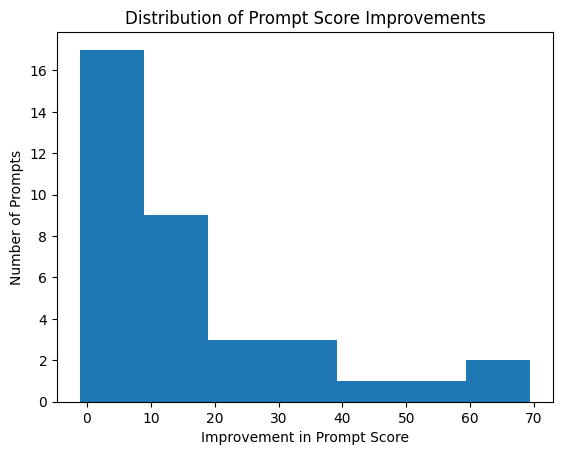

In [2]:
import matplotlib.pyplot as plt
plt.hist(deltas, bins=7)
plt.xlabel("Improvement in Prompt Score")
plt.ylabel("Number of Prompts")
plt.title("Distribution of Prompt Score Improvements")
plt.show()

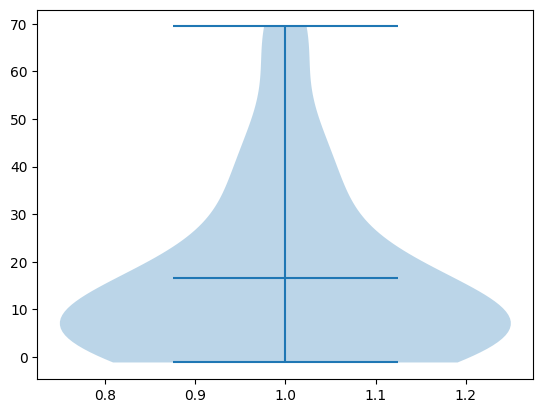

In [3]:
import matplotlib.pyplot as plt
plt.figure()
plt.violinplot(deltas, showmeans=True)
plt.show()